In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [8]:
honey_data=pd.read_csv(r'C:\Users\trina\Downloads\honeyproduction 1998-2021.csv')

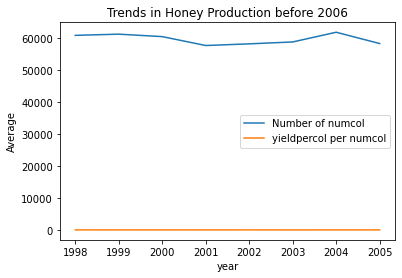

In [11]:
pre_2006_data = honey_data[honey_data['year'] < 2006] 
avg_numcol = pre_2006_data.groupby('year')['numcol'].mean()
avg_yieldpercol = pre_2006_data.groupby('year')['yieldpercol'].mean()


plt.plot(avg_numcol.index, avg_numcol.values, label='Number of numcol')
plt.plot(avg_yieldpercol.index, avg_yieldpercol.values, label='yieldpercol per numcol')
 
plt.xlabel('year') 
plt.ylabel('Average')
plt.title('Trends in Honey Production before 2006') 
plt.legend()
plt.show()

In [8]:
df

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
980,Virginia,6000.0,40,240000.0,79000.0,8.23,1975000.0,2021
981,Washington,96000.0,32,3072000.0,1206000.0,2.52,7741000.0,2021
982,West Virginia,6000.0,43,258000.0,136000.0,4.80,1238000.0,2021
983,Wisconsin,42000.0,47,1974000.0,750000.0,2.81,5547000.0,2021


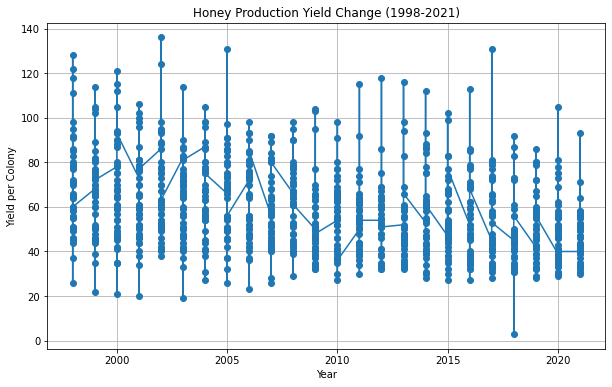

In [9]:
filtered_df = df[(df['year'] >= 1998) & (df['year'] <= 2021)]

# Create a line chart for honey production yield
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['year'], filtered_df['yieldpercol'], marker='o')
plt.xlabel('Year')
plt.ylabel('Yield per Colony')
plt.title('Honey Production Yield Change (1998-2021)')
plt.grid(True)
plt.show()


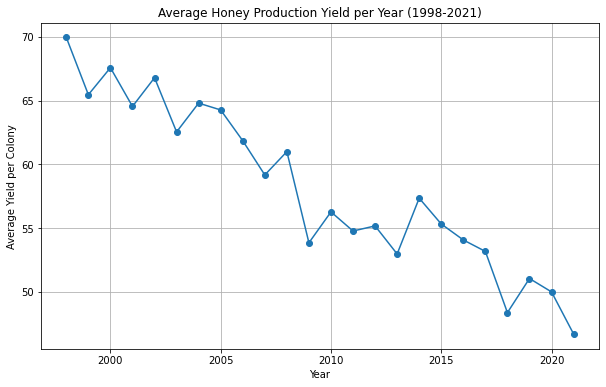

In [10]:

# Filter data for years 1998-2021
filtered_df = df[(df['year'] >= 1998) & (df['year'] <= 2021)]

# Calculate average yield per year
average_yield_per_year = filtered_df.groupby('year')['yieldpercol'].mean()

# Create a line chart for average yield per year
plt.figure(figsize=(10, 6))
plt.plot(average_yield_per_year.index, average_yield_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Yield per Colony')
plt.title('Average Honey Production Yield per Year (1998-2021)')
plt.grid(True)
plt.show()

<ipython-input-14-928d6f720117>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 3600x1440 with 0 Axes>

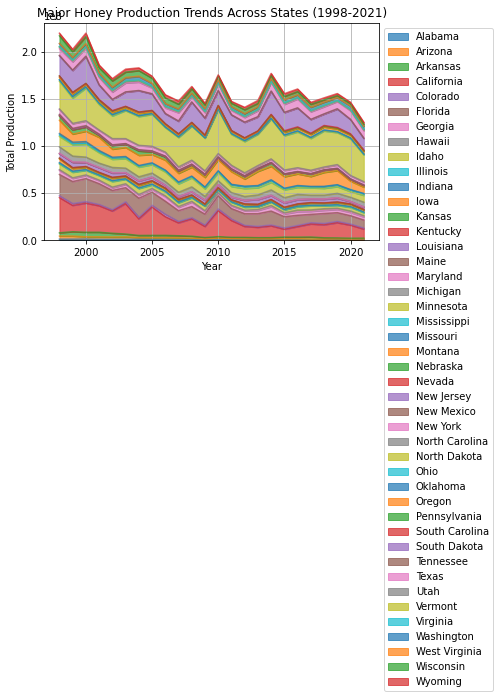

In [14]:
# Filter data for years 1998-2021
filtered_df = df[(df['year'] >= 1998) & (df['year'] <= 2021)]

# Pivot the data to get states as columns and years as indices
pivot_df = filtered_df.pivot(index='year', columns='State', values='totalprod')
# Customize x-axis ticks to show years and rotate them for better visibility
#plt.xticks(range(1998, 2022, 1), rotation=90)

# Create a stacked area chart for major production trends across states
plt.figure(figsize=(50, 20))
pivot_df.plot.area(alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Major Honey Production Trends Across States (1998-2021)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


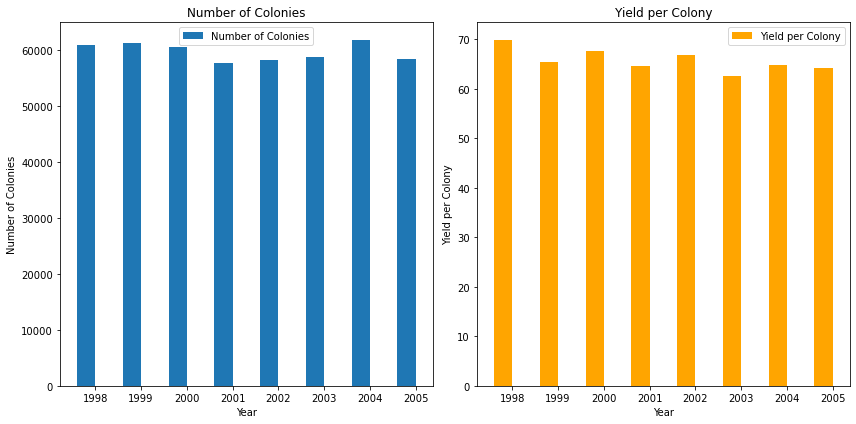

In [20]:
# Filter data for years before 2006
pre_2006_df = df[df['year'] < 2006]

# Set up positions for the bars
years = pre_2006_df['year'].unique()
bar_width = 0.4
bar_positions_numcol = np.arange(len(years))
bar_positions_yield = bar_positions_numcol + bar_width

# Create a bar chart for colonies and yield per colony
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)
ax1.bar(bar_positions_numcol, pre_2006_df.groupby('year')['numcol'].mean(), width=bar_width, label='Number of Colonies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies')
ax1.set_title('Number of Colonies')
ax1.set_xticks(bar_positions_numcol + bar_width / 2)
ax1.set_xticklabels(years)
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.bar(bar_positions_yield, pre_2006_df.groupby('year')['yieldpercol'].mean(), width=bar_width, label='Yield per Colony', color='orange')
ax2.set_xlabel('Year')
ax2.set_ylabel('Yield per Colony')
ax2.set_title('Yield per Colony')
ax2.set_xticks(bar_positions_yield + bar_width / 2)
ax2.set_xticklabels(years)
ax2.legend()

plt.tight_layout()
plt.show()

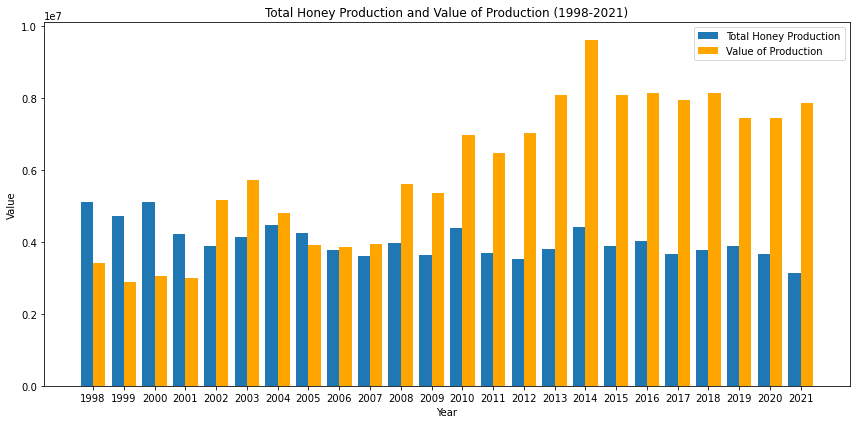

In [13]:
# Filter data for years 1998-2021
filtered_df = df[(df['year'] >= 1998) & (df['year'] <= 2021)]

# Set up positions for the bars
years = filtered_df['year'].unique()
bar_width = 0.4
bar_positions_totalprod = np.arange(len(years))
bar_positions_value = bar_positions_totalprod + bar_width

# Create a grouped bar chart for total honey production and value of production
plt.figure(figsize=(12, 6))

plt.bar(bar_positions_totalprod, filtered_df.groupby('year')['totalprod'].mean(), width=bar_width, label='Total Honey Production')
plt.bar(bar_positions_value, filtered_df.groupby('year')['prodvalue'].mean(), width=bar_width, label='Value of Production', color='orange')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Total Honey Production and Value of Production (1998-2021)')
plt.xticks(bar_positions_totalprod + bar_width / 2, years)
plt.legend()
plt.tight_layout()
plt.show()

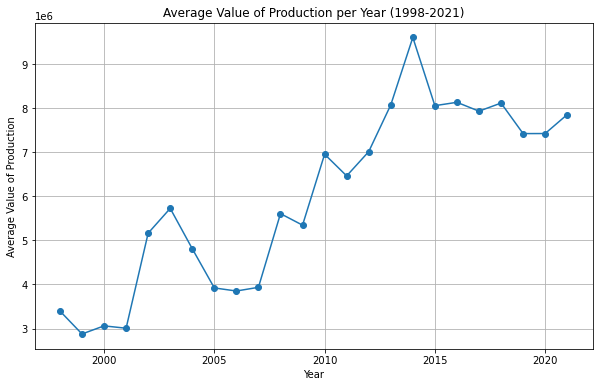

In [26]:
# Calculate average value of production per year
average_value_per_year = filtered_df.groupby('year')['prodvalue'].mean()

# Create a line chart for average value of production per year
plt.figure(figsize=(10, 6))
plt.plot(average_value_per_year.index, average_value_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Value of Production')
plt.title('Average Value of Production per Year (1998-2021)')
plt.grid(True)
plt.show()